In [1]:
#Importando as bibliotecas necessárias para explorar os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Lendo as 3 partes do dataset de São Paulo, considerando o separador como ponto e vírgula, avisando e pulando as linhas que possuem problemas "on bad lines"
dfSP1 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP1.csv', sep=';', on_bad_lines='warn')
dfSP2 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP2.csv', sep=';', on_bad_lines='warn')
dfSP3 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP3.csv', sep=';', on_bad_lines='warn')

/tmp/ipykernel_18/2570457407.py:2: ParserWarning: Skipping line 3394310: expected 64 fields, saw 65

  dfSP1 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP1.csv', sep=';', on_bad_lines='warn')
/tmp/ipykernel_18/2570457407.py:2: DtypeWarning: Columns (4,12,21,23,36,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSP1 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP1.csv', sep=';', on_bad_lines='warn')
/tmp/ipykernel_18/2570457407.py:3: DtypeWarning: Columns (12,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSP2 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP2.csv', sep=';', on_bad_lines='warn')
/tmp/ipykernel_18/2570457407.py:4: DtypeWarning: Columns (12,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSP3 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP3.csv', sep=';', on_bad_lines='warn')


In [3]:
#Combinando todos os dataframes em um só
dfSP = pd.concat([dfSP1, dfSP2, dfSP3], ignore_index=True)
dfSP.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Tosse, Febre, Dor de Garganta, Coriza",Não,Preta,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2023-11-16,NaN,NaN,NaN,NaN
1,Assintomático,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2023-10-11,NaN,NaN,NaN,7.0
2,"Tosse, Dor de Garganta, Outros",Não,Branca,MIALGIA,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2023-03-17,NaN,NaN,NaN,8.0
3,"Coriza, Dor de Cabeça, Tosse",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2023-10-11,NaN,NaN,NaN,37.0
4,"Dor de Cabeça, Febre, Outros",Não,Branca,"DOR NO CORPO, APETITE DIMINUIDO",NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2023-12-06,NaN,NaN,NaN,25.0


In [4]:
#Exibindo as colunas do dataframe para entender todas as variáveis
dfSP.columns

Index(['sintomas', 'profissionalSaude', 'racaCor', 'outrosSintomas',
       'outrasCondicoes', 'profissionalSeguranca', 'cbo', 'condicoes', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem',
       'estadoNotificacao', 'municipioNotificacao', 'municipioNotificacaoIBGE',
       'evolucaoCaso', 'classificacaoFinal', 'codigoEstrategiaCovid',
       'codigoBuscaAtivaAssintomatico', 'outroBuscaAtivaAssintomatico',
       'codigoTriagemPopulacaoEspecifica', 'outroTriagemPopulacaoEspecifica',
       'codigoLocalRealizacaoTestagem', 'outroLocalRealizacaoTestagem',
       'codigoRecebeuVacina', 'codigoLaboratorioPrimeiraDose',
       'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose',
       'codigoContemComunidadeTradicional', 'source_id', 'excluido',
       'validado', 'codigoDosesVacina', 'estadoNotificacaoIBGE',
       'totalTestesRealizados', 'dataNotificacao', 'dataInicioSintomas',
       'dataEncerramento', 'dataPrimeiraDose', 'dataSegundaDo

In [5]:
#Buscando possíveis tópicos para explorar os dados

#Verificando se há registros de comunidades tradicionais dentro do estado de São Paulo
pacientesComunidades = dfSP[dfSP['codigoContemComunidadeTradicional']==1]['sintomas'].count()
pacientesOutros = dfSP[dfSP['codigoContemComunidadeTradicional']==2]['sintomas'].count()

print('Pacientes de comunidades tradicionais:', pacientesComunidades)
print('Outros pacientes:', pacientesOutros)
print('Percentual em relação ao total:', pacientesComunidades / pacientesOutros * 100, '%')

Pacientes de comunidades tradicionais: 6070
Outros pacientes: 5366497
Percentual em relação ao total: 0.11310916599785671 %


In [6]:
#Locais de realização da testagem
#1 - Serviço de saúde (UBS, hospítal, UPA, etc)
#2 - Local de trabalho
#3 - Aeroporto
#4 - Farmácia ou drogaria
#5 - Escola
#6 - Domicílio ou comunidade
#7 - Outro
dfSP.groupby(['codigoLocalRealizacaoTestagem'])['sintomas'].count().sort_values(ascending=False)

codigoLocalRealizacaoTestagem
1.0    4767567
4.0     261844
3.0      83909
7.0      80616
2.0      21527
6.0       4526
5.0        765
Name: sintomas, dtype: int64

In [7]:
#Tipos de estratégia de testagem de Covid
#1 - Diagnóstico assistencial (sintomático)
#2 - Busca ativa de assintomático
#3 - Triagem de população específica
estrategias = dfSP.groupby(['codigoEstrategiaCovid'])['sintomas'].count().sort_values(ascending=False)
print (estrategias)

codigoEstrategiaCovid
1.0    4999055
2.0     195200
3.0      26496
Name: sintomas, dtype: int64


In [8]:
#Percentual de estratégia de busca ativa de assintomáticos em relação ao total
print(estrategias[2]/estrategias.sum() * 100, '%')

3.738925683297288 %


In [9]:
#Elencando o número de pessoas que receberam vacina ou não
#Segundo documentação:
#1 - Sim
#2 - Não 
#3 - Ignorado
vacinados = dfSP.groupby(['codigoRecebeuVacina'])['sintomas'].count().sort_values(ascending=False)
print(vacinados)

codigoRecebeuVacina
1.0    3443838
2.0     505191
3.0       3574
Name: sintomas, dtype: int64


In [10]:
#Percentual de pessoas que relataram síndrome gripal mas que não se vacinaram
#(Desconsiderando as pessoas que não confirmaram)
print(vacinados[2]/(vacinados[1] + vacinados[2]) * 100, '%')

12.792790328964413 %


In [11]:
#Talvez montar um gráfico exibindo quais são os sintomas mais comuns
#(e a quantidade deles) quando a pessoa se vacinou e quando a pessoa não
#se vacinou. Tentar traçar um paralelo também com a quantidade de vacinas
#Talvez ter uma evidência de que quanto mais vacinado, melhor

In [12]:
#Status de evolução da doença, agrupados
evolucao = dfSP.groupby(['evolucaoCaso'])['sintomas'].count()
print(evolucao.sort_values(ascending=False))

evolucaoCaso
Cura                        2856972
Ignorado                     334756
Em tratamento domiciliar      81312
Cancelado                     73683
Internado                      3253
Óbito                          2004
Internado em UTI                252
Name: sintomas, dtype: int64


In [13]:
#Número de pessoas que morreram e que não se vacinaram
dfObitos = dfSP[dfSP['evolucaoCaso'] == 'Óbito']
total = dfObitos[dfObitos['codigoRecebeuVacina']==1]['sintomas'].count() + dfObitos[dfObitos['codigoRecebeuVacina']==2]['sintomas'].count()
naoVacinados = dfObitos[dfObitos['codigoRecebeuVacina'] == 2]['sintomas'].count()
print(naoVacinados / total * 100, '%')

11.448598130841122 %


In [14]:
#Agrupando todos os sintomas para contar quais sintomas são mais comuns
sintomas = dfSP['sintomas'].str.split(',').explode()

print(sintomas.value_counts().sort_values(ascending=False))

sintomas
 Tosse                    1872613
Coriza                    1766816
 Dor de Garganta          1566829
 Febre                    1284601
 Dor de Cabeça            1221336
Tosse                     1004050
Assintomático              933457
 Outros                    858652
Dor de Cabeça              780421
 Coriza                    461260
 Dispneia                  394179
Febre                      332897
Dor de Garganta            313927
Outros                     191605
 Distúrbios Gustativos     147896
 Distúrbios Olfativos      107780
Dispneia                    88936
Distúrbios Olfativos        55510
Distúrbios Gustativos       44166
 Assintomático               2063
 Dispineia                      1
Name: count, dtype: int64


In [15]:
#Saíram resultados com contagens diferentes por conta de espaços em branco
#Limpando as strings que possuem espaço em branco
sintomas = sintomas.str.lstrip()

#Teve um único resultado "Dispineia", que foi escrito incorretamente
#Transferindo para o termo correto
sintomas[sintomas == "Dispineia"] = "Dispneia"

print(sintomas.value_counts().sort_values(ascending=False))

sintomas
Tosse                    2876663
Coriza                   2228076
Dor de Cabeça            2001757
Dor de Garganta          1880756
Febre                    1617498
Outros                   1050257
Assintomático             935520
Dispneia                  483116
Distúrbios Gustativos     192062
Distúrbios Olfativos      163290
Name: count, dtype: int64


In [16]:
#Criando um dataframe com base na contagem dos sintomas
dfSintomas = pd.DataFrame(sintomas.value_counts(), columns=['count'])

dfSintomas.reset_index(inplace=True)
dfSintomas.columns = ['Sintomas', 'Ocorrencias']

dfSintomas.head()

,Sintomas,Ocorrencias
0,Tosse,2876663
1,Coriza,2228076
2,Dor de Cabeça,2001757
3,Dor de Garganta,1880756
4,Febre,1617498


<Axes: xlabel='Sintomas', ylabel='Ocorrencias'>

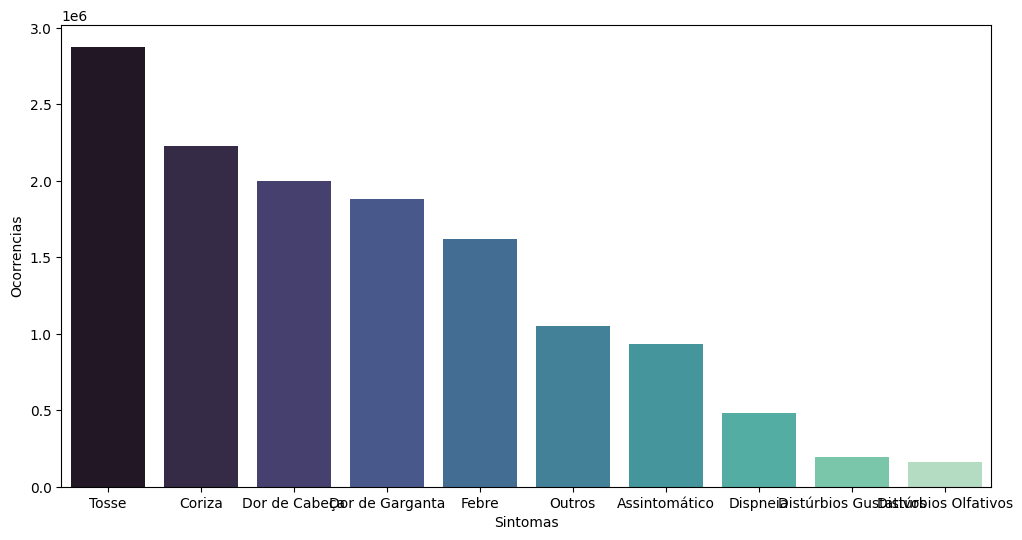

In [17]:
#Exibir gráfico usando o Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=dfSintomas, x='Sintomas', y='Ocorrencias', palette='mako')

Text(0, 0.5, 'Total de ocorrências')

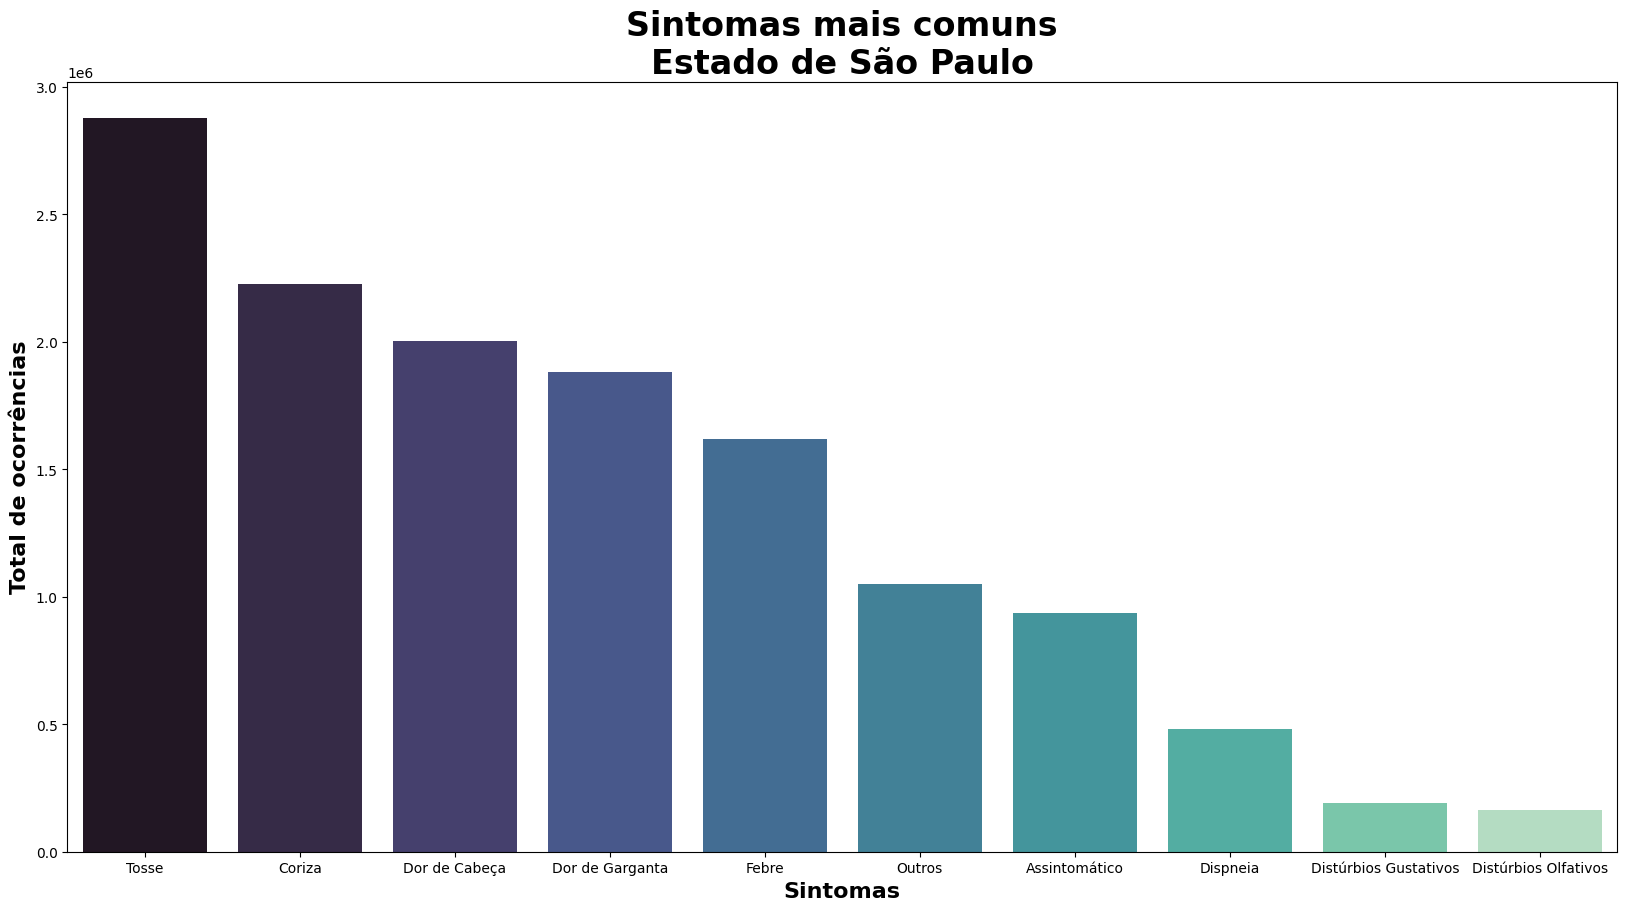

In [18]:
#Dá para aplicar alguns ajustes (tamanho do gráfico, títulos, etc...)
plt.figure(figsize=(20,10))
sns.barplot(data=dfSintomas, x='Sintomas', y='Ocorrencias', palette='mako')

plt.title('Sintomas mais comuns\nEstado de São Paulo', fontsize=24, fontweight='bold')
plt.xlabel('Sintomas', fontsize=16, fontweight='bold')
plt.ylabel('Total de ocorrências', fontsize=16, fontweight='bold')

In [19]:
#Se for parar para ver, não faz sentido ter "Assintomático", já que quero
#ter uma lista dos sintomas mais comuns

#Deletando tabela de "Assintomáticos"
dfSintomas = dfSintomas.drop(dfSintomas[dfSintomas['Sintomas']=='Assintomático'].index)
dfSintomas.head(10)

,Sintomas,Ocorrencias
0,Tosse,2876663
1,Coriza,2228076
2,Dor de Cabeça,2001757
3,Dor de Garganta,1880756
4,Febre,1617498
5,Outros,1050257
7,Dispneia,483116
8,Distúrbios Gustativos,192062
9,Distúrbios Olfativos,163290


In [20]:
#Verificar a composição do grupo de "outros" sintomas no dataframe principal
dfSP[dfSP['outrosSintomas'].notna()].groupby(['outrosSintomas'])['sintomas'].count().sort_values(ascending=False).head(20)

outrosSintomas
MIALGIA             122380
DOR NO CORPO         84064
mialgia              29619
DIARREIA             24358
dor no corpo         21475
CANSAÇO               9907
FRAQUEZA              9147
CONGESTÃO NASAL       8882
DOR NAS COSTAS        8737
VOMITO                7829
ESPIRROS              7250
MAL ESTAR             7172
Mialgia               6630
SINTOMAS GRIPAIS      6376
diarreia              6289
CONGESTAO NASAL       6010
DOR NO PEITO          5811
DOR DE OUVIDO         5635
CALAFRIOS             5350
ASSINTOMATICO         5283
Name: sintomas, dtype: int64

In [21]:
#Copiando o dataframe dfSP para não poluir o original
dfSPoutros = dfSP.copy()

In [22]:
#Mialgia, dor no corpo e etc... são a mesma coisa
#Existem vários itens parecidos, como diarréia, fraqueza/fadiga,
#congestão nasal (é coriza).

#Setando todos esses para o mesmo valor comum

#Mialgia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin([
    'dor no corpo',
    'mialgia',
    'dor nas costas',
    'dor no peito',
    'dor abdominal',
    'dor de ouvido',
    'dores no corpo',
    'dor corpo',
    'dorsalgia',
    'dor nos olhos',
    'dor toracica',
    'dor no corpo.',
    'otalgia',
    'mialgia.',
    'dor lombar',
    'dor muscular',
    'dor no ouvido',
    'dor na face']), 'outrosSintomas'] = 'Mialgia'

#Diarréia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['diarreia', 'diarréia']), 'outrosSintomas'] = 'Diarréia'

#Fadiga
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['cansaço', 'fraqueza', 'mal estar', 'fadiga']), 'outrosSintomas'] = 'Fadiga'

#Coriza
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['congestão nasal', 'congestao nasal', 'coriza', 'obstrução nasal']), 'outrosSintomas'] = 'Coriza'

#Vômito
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['vomito', 'vômito', 'vomitos', 'vômitos']), 'outrosSintomas'] = 'Vômito'

#Náusea
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['nausea', 'náusea', 'nauseas', 'náuseas']), 'outrosSintomas'] = 'Náusea'

#Tontura
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['tontura', 'tonturas']), 'outrosSintomas'] = 'Tontura'

#Dor de cabeça
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower() == 'cefaleia', 'outrosSintomas'] = 'Dor de cabeça'

#Dispneia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower() == 'falta de ar', 'outrosSintomas'] = 'Dispneia'

#Calafrios
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['calafrios', 'calafrio']), 'outrosSintomas'] = 'Coriza'

#Espirros
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['espirros', 'espirro', 'sintomas gripais', 'gripe', 'gripal', 'sindrome gripal']), 'outrosSintomas'] = 'Espirros'

#Odinofagia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower() == 'odinofagia', 'outrosSintomas'] = 'Odinofagia'

#Assintomático
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['assintomatico', 'assintomático']), 'outrosSintomas'] = 'Assintomático'

#Rouquidão
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['rouquidão', 'rouquidao']), 'outrosSintomas'] = 'Rouquidão'

dfSPoutros[dfSPoutros['outrosSintomas'].notna()].groupby(['outrosSintomas'])['sintomas'].count().sort_values(ascending=False).head(15)

outrosSintomas
Mialgia                           328655
Fadiga                             40457
Espirros                           37054
Diarréia                           36383
Coriza                             35053
Vômito                             15388
Assintomático                      10450
Náusea                              7572
Dispneia                            6677
Dor de cabeça                       5369
Tontura                             5276
Rouquidão                           4940
Odinofagia                          4090
Outros Sintomas não informados      1881
PROTOCOLO INSTITUCIONAL             1566
Name: sintomas, dtype: int64

In [23]:
#Criando dataframe com base na soma de valores de outros sintomas
dfOutros = pd.DataFrame(dfSPoutros['outrosSintomas'].value_counts(), columns=['count'])

dfOutros.reset_index(inplace=True)
dfOutros.columns = ['Sintomas', 'Ocorrencias']

dfOutros.head(15)

,Sintomas,Ocorrencias
0,Mialgia,328655
1,Fadiga,40457
2,Espirros,37054
3,Diarréia,36383
4,Coriza,35053
5,Vômito,15388
6,Assintomático,10450
7,Náusea,7572
8,Dispneia,6677
9,Dor de cabeça,5369


In [24]:
#Ajustando o dataframe final com a contagem de valores
#Adicionando os dados de Mialgia, Fadiga, Espirros e Diarréia como novos sintomas
dfSintomas = pd.concat([dfSintomas, dfOutros.iloc[:4]], ignore_index=True)

dfSintomas.head(15)

,Sintomas,Ocorrencias
0,Tosse,2876663
1,Coriza,2228076
2,Dor de Cabeça,2001757
3,Dor de Garganta,1880756
4,Febre,1617498
5,Outros,1050257
6,Dispneia,483116
7,Distúrbios Gustativos,192062
8,Distúrbios Olfativos,163290
9,Mialgia,328655


In [25]:
#Contando o restante dos outros sintomas

coriza = dfSintomas[dfSintomas['Sintomas'] == 'Coriza']['Ocorrencias'].iloc[0]
maisCoriza = dfOutros[dfOutros['Sintomas'] == 'Coriza']['Ocorrencias'].iloc[0]

dorCabeca = dfSintomas[dfSintomas['Sintomas'] == 'Dor de Cabeça']['Ocorrencias'].iloc[0]
maisDorCabeca = dfOutros[dfOutros['Sintomas'] == 'Dor de cabeça']['Ocorrencias'].iloc[0]

dispneia = dfSintomas[dfSintomas['Sintomas'] == 'Dispneia']['Ocorrencias'].iloc[0]
maisDispneia = dfOutros[dfOutros['Sintomas'] == 'Dispneia']['Ocorrencias'].iloc[0]

assintomaticos = dfOutros[dfOutros['Sintomas'] == 'Assintomático']['Ocorrencias'].iloc[0]

#Contando a quantidade de outros (estou contabilizando somente aqueles valores
#que foram marcados como 'Outros', mas que também responderam alguma coisa)
outros = dfOutros.iloc[4:]['Ocorrencias'].sum()
#novoOutros = dfSintomas[dfSintomas['Sintomas'] == 'Outros']['Ocorrencias'].iloc[0]
novoOutros = outros - maisCoriza - maisDorCabeca - maisDispneia - assintomaticos

print('Coriza antes:', coriza,
      '\nCoriza depois:', coriza + maisCoriza,
      '\nDor de cabeça antes:', dorCabeca,
      '\nDor de cabeça depois:', dorCabeca + maisDorCabeca,
      '\nDispneia antes:', dispneia,
      '\nDispneia depois:', dispneia + maisDispneia,
      '\nAssintomáticos:', assintomaticos,
      '\nTotal de outros sintomas:', outros,
      '\nNovo total de outros sintomas:', novoOutros)


Coriza antes: 2228076 
Coriza depois: 2263129 
Dor de cabeça antes: 2001757 
Dor de cabeça depois: 2007126 
Dispneia antes: 483116 
Dispneia depois: 489793 
Assintomáticos: 10450 
Total de outros sintomas: 604091 
Novo total de outros sintomas: 546542


In [26]:
#Setando novos valores no dataframe final
dfSintomas.loc[dfSintomas['Sintomas'] == 'Outros', 'Ocorrencias'] = novoOutros
dfSintomas.loc[dfSintomas['Sintomas'] == 'Coriza', 'Ocorrencias'] = coriza + maisCoriza
dfSintomas.loc[dfSintomas['Sintomas'] == 'Dor de Cabeça', 'Ocorrencias'] = dorCabeca + maisDorCabeca
dfSintomas.loc[dfSintomas['Sintomas'] == 'Dispneia', 'Ocorrencias'] = dispneia + maisDispneia

In [27]:
#Exibindo resultado final
dfSintomas.head(15)

,Sintomas,Ocorrencias
0,Tosse,2876663
1,Coriza,2263129
2,Dor de Cabeça,2007126
3,Dor de Garganta,1880756
4,Febre,1617498
5,Outros,546542
6,Dispneia,489793
7,Distúrbios Gustativos,192062
8,Distúrbios Olfativos,163290
9,Mialgia,328655


In [28]:
#Organizando os valores de acordo com a quantidade de ocorrências
dfSintomas = dfSintomas.sort_values(by=['Ocorrencias'], ascending=False)
dfSintomas.head(15)

,Sintomas,Ocorrencias
0,Tosse,2876663
1,Coriza,2263129
2,Dor de Cabeça,2007126
3,Dor de Garganta,1880756
4,Febre,1617498
5,Outros,546542
6,Dispneia,489793
9,Mialgia,328655
7,Distúrbios Gustativos,192062
8,Distúrbios Olfativos,163290


Text(0, 0.5, 'Total de ocorrências')

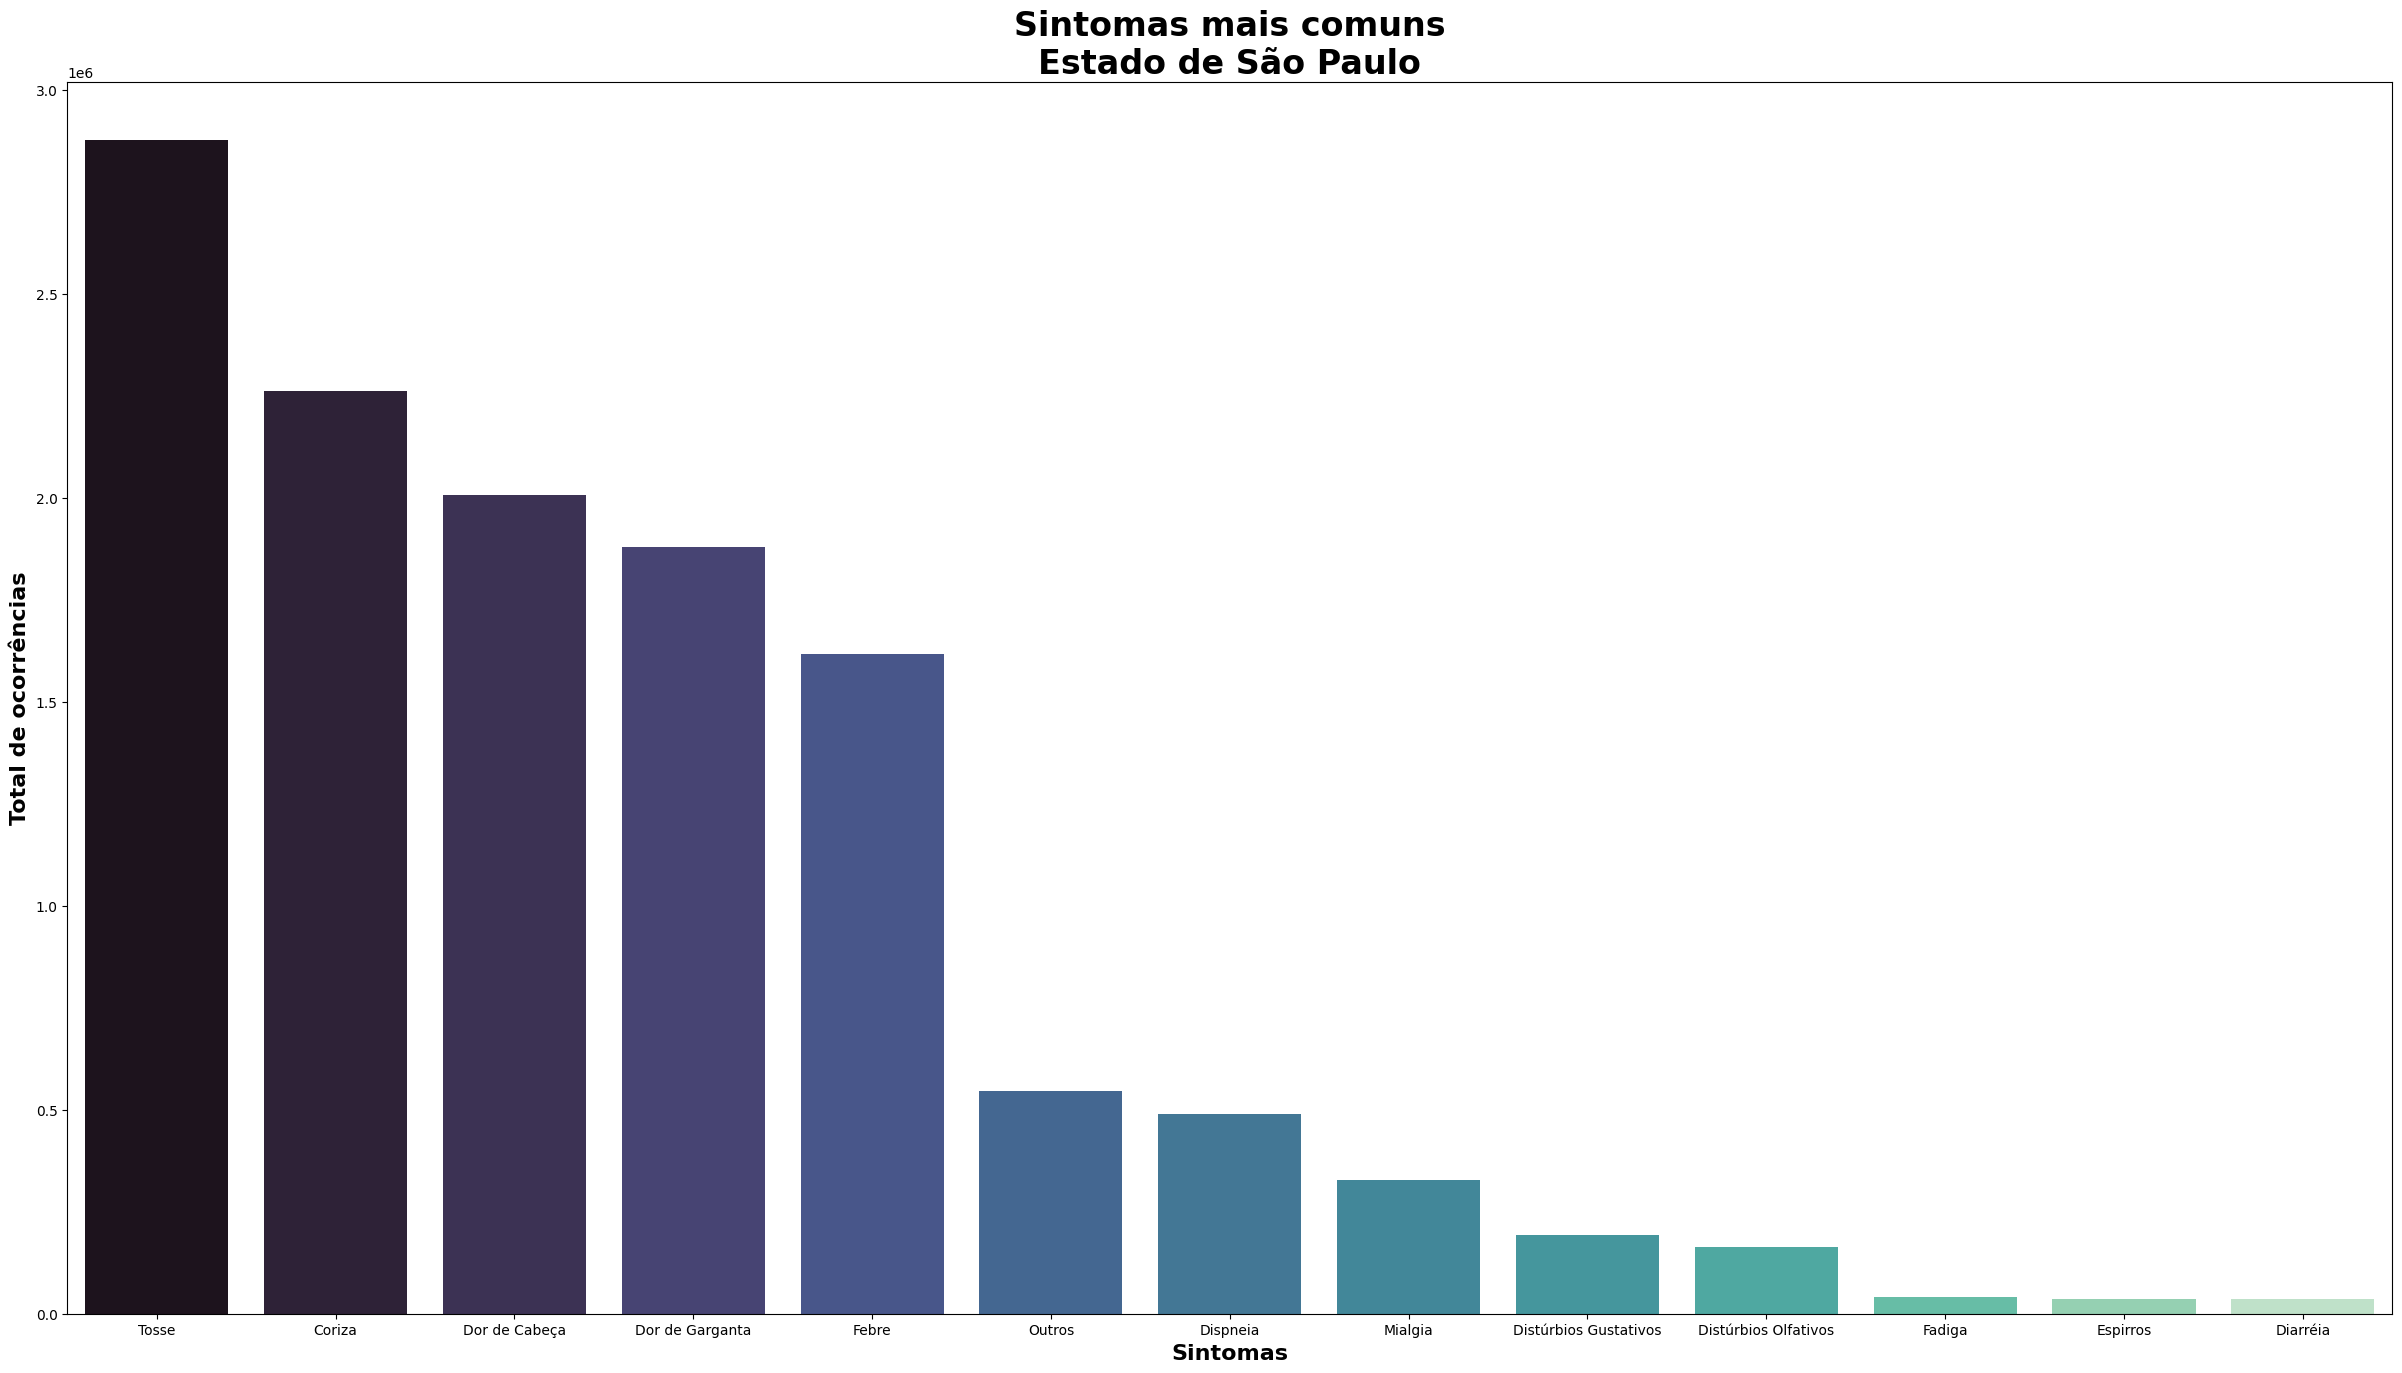

In [29]:
#Plotando o gráfico final
plt.figure(figsize=(30,16))
sns.barplot(data=dfSintomas, x='Sintomas', y='Ocorrencias', palette='mako')

plt.title('Sintomas mais comuns\nEstado de São Paulo', fontsize=24, fontweight='bold')
plt.xlabel('Sintomas', fontsize=16, fontweight='bold')
plt.ylabel('Total de ocorrências', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Sintomas mais comuns\nEstado de São Paulo')

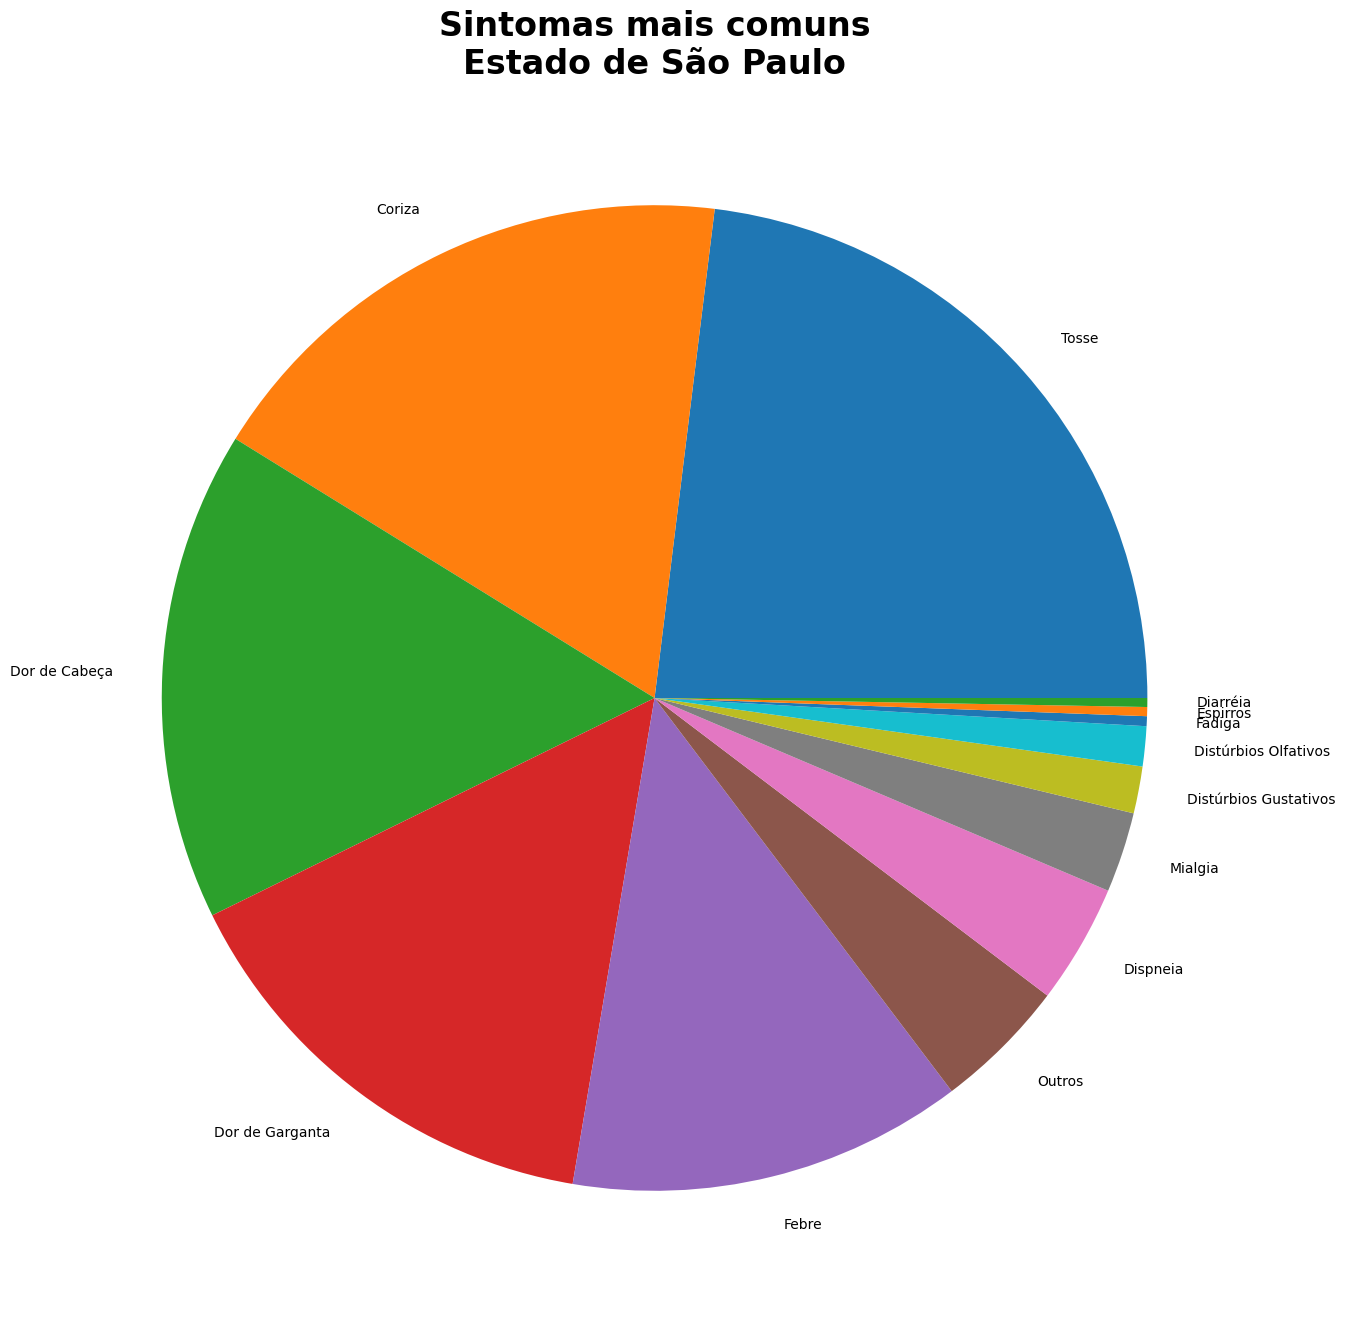

In [30]:
#Plotando um gráfico de pizza
plt.figure(figsize=(16,16))
plt.pie(dfSintomas['Ocorrencias'], labels=dfSintomas['Sintomas'])

plt.title('Sintomas mais comuns\nEstado de São Paulo', fontsize=24, fontweight='bold')
#plt.xlabel('Sintomas', fontsize=16, fontweight='bold')
#plt.ylabel('Total de ocorrências', fontsize=16, fontweight='bold')

In [31]:
#Easter Egg
dfSP[dfSP['outrosSintomas'] == '🤣']

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
4610654,Outros,Não,Branca,🤣,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2020-08-19,NaN,NaN,NaN,43.0
